In [174]:
import pandas as pd
import numpy as np
import random


# Create the dataset
data = {
    'Glucose': [185, 89, 120, 130, 150, 95, 140, 100],
    'Weight': [82, 65, 70, 72, 78, 60, 75, 66],
    'Diabetic': [1, 0, 1, 1, 1, 0, 1, 0]
}

# Convert to DataFrame
df = pd.DataFrame(data)


In [175]:
# initial prediction

df['pred1(log-odds)'] = np.log(5/3)
df

,Glucose,Weight,Diabetic,pred1(log-odds)
0,185,82,1,0.510826
1,89,65,0,0.510826
2,120,70,1,0.510826
3,130,72,1,0.510826
4,150,78,1,0.510826
5,95,60,0,0.510826
6,140,75,1,0.510826
7,100,66,0,0.510826


In [176]:
# convert log odds to probability
df['pred1(probability)'] = 1/(1+np.exp(-np.log(5/3)))
df

,Glucose,Weight,Diabetic,pred1(log-odds),pred1(probability)
0,185,82,1,0.510826,0.625
1,89,65,0,0.510826,0.625
2,120,70,1,0.510826,0.625
3,130,72,1,0.510826,0.625
4,150,78,1,0.510826,0.625
5,95,60,0,0.510826,0.625
6,140,75,1,0.510826,0.625
7,100,66,0,0.510826,0.625


In [177]:
# calculating residual for stage 1
df['res1'] = df['Diabetic'] - df['pred1(probability)']
df

,Glucose,Weight,Diabetic,pred1(log-odds),pred1(probability),res1
0,185,82,1,0.510826,0.625,0.375
1,89,65,0,0.510826,0.625,-0.625
2,120,70,1,0.510826,0.625,0.375
3,130,72,1,0.510826,0.625,0.375
4,150,78,1,0.510826,0.625,0.375
5,95,60,0,0.510826,0.625,-0.625
6,140,75,1,0.510826,0.625,0.375
7,100,66,0,0.510826,0.625,-0.625


In [178]:
df.iloc[:,0:2]

,Glucose,Weight
0,185,82
1,89,65
2,120,70
3,130,72
4,150,78
5,95,60
6,140,75
7,100,66


In [179]:
df.iloc[:,-1]

,res1
0,0.375
1,-0.625
2,0.375
3,0.375
4,0.375
5,-0.625
6,0.375
7,-0.625


In [180]:
# training the first decision tree
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

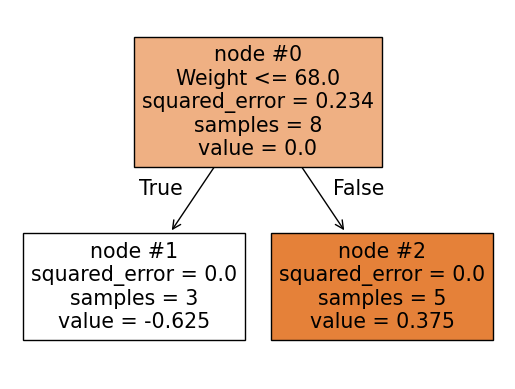

In [181]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(reg1, feature_names=['Glucose','Weight'],filled=True, node_ids=True)
plt.show()

In [182]:
df['leaf_entry1'] = reg1.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,Glucose,Weight,Diabetic,pred1(log-odds),pred1(probability),res1,leaf_entry1
0,185,82,1,0.510826,0.625,0.375,2
1,89,65,0,0.510826,0.625,-0.625,1
2,120,70,1,0.510826,0.625,0.375,2
3,130,72,1,0.510826,0.625,0.375,2
4,150,78,1,0.510826,0.625,0.375,2
5,95,60,0,0.510826,0.625,-0.625,1
6,140,75,1,0.510826,0.625,0.375,2
7,100,66,0,0.510826,0.625,-0.625,1


In [183]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()

  den = sum(temp_df['pred1(probability)'] * (1 - temp_df['pred1(probability)']))
  return round(num/den,2)

In [184]:
df['pred2(log-odds)'] = df['pred1(log-odds)'] + df['leaf_entry1'].apply(return_logs)

In [185]:
df['pred2(probability)'] = 1/(1+np.exp(-df['pred2(log-odds)']))
df

,Glucose,Weight,Diabetic,pred1(log-odds),pred1(probability),res1,leaf_entry1,pred2(log-odds),pred2(probability)
0,185,82,1,0.510826,0.625,0.375,2,2.110826,0.891951
1,89,65,0,0.510826,0.625,-0.625,1,-2.159174,0.103477
2,120,70,1,0.510826,0.625,0.375,2,2.110826,0.891951
3,130,72,1,0.510826,0.625,0.375,2,2.110826,0.891951
4,150,78,1,0.510826,0.625,0.375,2,2.110826,0.891951
5,95,60,0,0.510826,0.625,-0.625,1,-2.159174,0.103477
6,140,75,1,0.510826,0.625,0.375,2,2.110826,0.891951
7,100,66,0,0.510826,0.625,-0.625,1,-2.159174,0.103477


In [186]:
df['res2'] = df['Diabetic'] - df['pred2(probability)']
df

,Glucose,Weight,Diabetic,pred1(log-odds),pred1(probability),res1,leaf_entry1,pred2(log-odds),pred2(probability),res2
0,185,82,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049
1,89,65,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477
2,120,70,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049
3,130,72,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049
4,150,78,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049
5,95,60,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477
6,140,75,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049
7,100,66,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477


In [187]:
df.iloc[:,0:2]

,Glucose,Weight
0,185,82
1,89,65
2,120,70
3,130,72
4,150,78
5,95,60
6,140,75
7,100,66


In [188]:
df.iloc[:,-1]

,res2
0,0.108049
1,-0.103477
2,0.108049
3,0.108049
4,0.108049
5,-0.103477
6,0.108049
7,-0.103477


In [189]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, min_samples_leaf=2, random_state=100)

reg2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, min_samples_leaf=2, random_state=100)

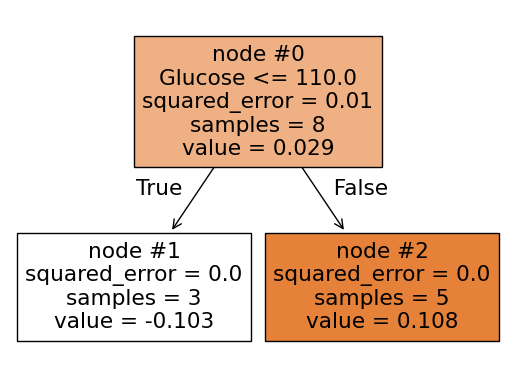

In [190]:
plot_tree(reg2, feature_names=['Glucose','Weight'],filled=True, node_ids=True)
plt.show()

In [191]:
df['leaf_entry2'] = reg2.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,Glucose,Weight,Diabetic,pred1(log-odds),pred1(probability),res1,leaf_entry1,pred2(log-odds),pred2(probability),res2,leaf_entry2
0,185,82,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049,2
1,89,65,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477,1
2,120,70,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049,2
3,130,72,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049,2
4,150,78,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049,2
5,95,60,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477,1
6,140,75,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049,2
7,100,66,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477,1


In [192]:
def return_logs(leaf):
  num = df[df['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(df[df['leaf_entry2'] == leaf]['pred2(probability)'] * (1 - df[df['leaf_entry2'] == leaf]['pred2(probability)']))
  return round(num/den,2)

In [193]:
df['pred3(log-odds)'] = df['pred1(log-odds)'] + df['pred2(log-odds)'] + df['leaf_entry2'].apply(return_logs)

In [194]:
df['pred3(probability)'] = 1/(1+np.exp(-df['pred3(log-odds)']))
df

,Glucose,Weight,Diabetic,pred1(log-odds),pred1(probability),res1,leaf_entry1,pred2(log-odds),pred2(probability),res2,leaf_entry2,pred3(log-odds),pred3(probability)
0,185,82,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049,2,3.741651,0.976834
1,89,65,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477,1,-2.768349,0.059059
2,120,70,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049,2,3.741651,0.976834
3,130,72,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049,2,3.741651,0.976834
4,150,78,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049,2,3.741651,0.976834
5,95,60,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477,1,-2.768349,0.059059
6,140,75,1,0.510826,0.625,0.375,2,2.110826,0.891951,0.108049,2,3.741651,0.976834
7,100,66,0,0.510826,0.625,-0.625,1,-2.159174,0.103477,-0.103477,1,-2.768349,0.059059


In [195]:
df['res_final'] = df['Diabetic'] - df['pred3(probability)']

df[['res1','res2','res_final']]

,res1,res2,res_final
0,0.375,0.108049,0.023166
1,-0.625,-0.103477,-0.059059
2,0.375,0.108049,0.023166
3,0.375,0.108049,0.023166
4,0.375,0.108049,0.023166
5,-0.625,-0.103477,-0.059059
6,0.375,0.108049,0.023166
7,-0.625,-0.103477,-0.059059
